## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Making data.
If you have your own data import it here

In [31]:
x = np.array(range(100))
y = pow(x,5)



## Visualizing data

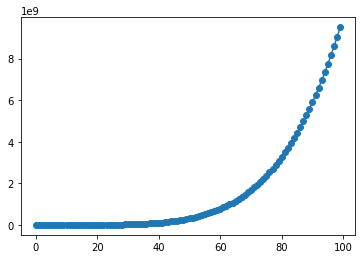

In [32]:
plt.plot(x,y, marker="o")

## Pearson’s Correlation

# Formula:
correlation_coefficient_formula.svg



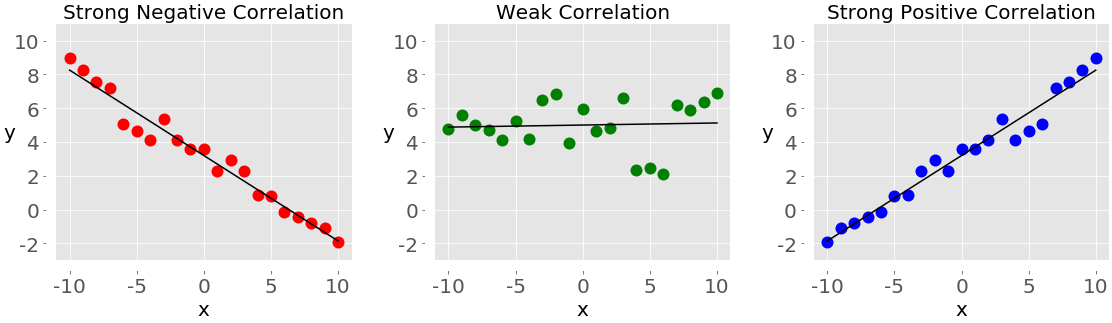

Numpy

In [42]:
pcorr1 = np.corrcoef(x,y)
print("Pearson’s Correlation value is:",pcorr1[0,1])

Pearson’s Correlation value is: 0.8194002495559086


scipy:

In [40]:
pcorr2 = scipy.stats.pearsonr(x,y)
print("Pearson’s Correlation value is:",pcorr2[0])

Pearson’s Correlation value is: 0.8194002495559087


## Spearman’s Correlation

# Formula: 
correlation_coefficient_formula.svg


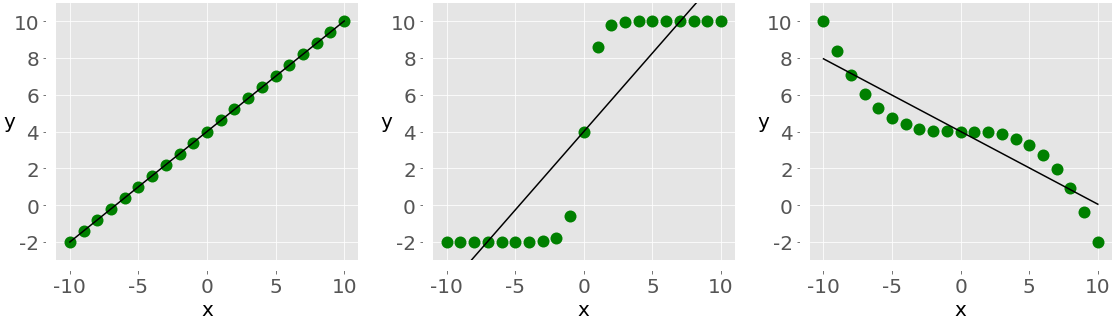

Scipy:

In [43]:
s_corr2 = scipy.stats.spearmanr(x,y)
print("Spearman’s Correlation value is:",s_corr2[0])

Pearson’s Correlation value is: 0.9999999999999999


Pandas:

In [49]:
xy = pd.DataFrame({'x-values': x, 'y-values': y})
s_corr1 = xy.corr(method="spearman")

print( "Spearman’s Correlation value is:",xy.corr(method="spearman")['x-values'][0])

Spearman’s Correlation value is: 1.0


## Chatterjee Correlation
**Articel**:https://arxiv.org/abs/1909.10140?source=techstories.org

# Formula:
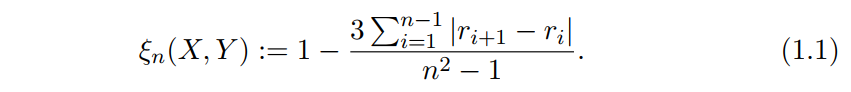



First Make dataframe

In [46]:
df = pd.DataFrame(zip(x,y),columns=["x","y"])
df["yranks"]= df["y"].rank()
df.head()

,x,y,yranks
0,0,0,1.0
1,1,1,2.0
2,2,32,3.0
3,3,243,4.0
4,4,1024,5.0


Sort valus by x

In [47]:
df = df.sort_values("x") #Sort by the rank of X
df.head()

,x,y,yranks
0,0,0,1.0
1,1,1,2.0
2,2,32,3.0
3,3,243,4.0
4,4,1024,5.0


Implement summation

In [50]:
rank_series = df["yranks"].reset_index(drop=True)
rank_series
diff = []
for i in range(len(rank_series)-1):
    diff.append(abs(rank_series[i+1]-rank_series[i]))
    
xi =1-3*(sum(diff)/(len(y)**2-1))
print( "Chatterjee Correlation value is:",xi)

Spearman’s Correlation value is: 0.9702970297029703


## MIC Correlation

How to install: https://minepy.readthedocs.io/en/latest/python.html

#Formula:

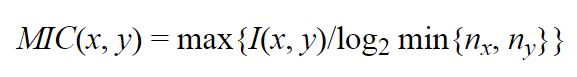

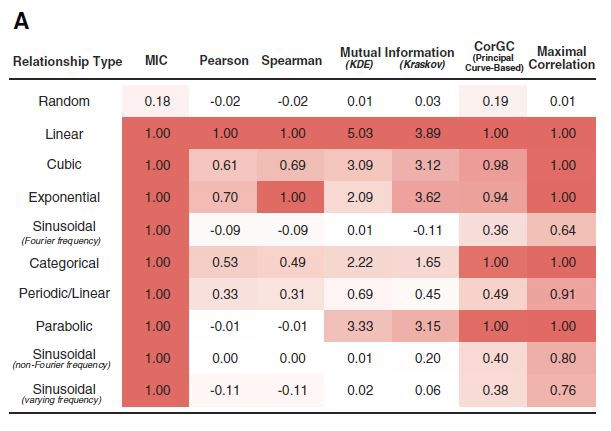


In [51]:
pip install minepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 496 kB 28.1 MB/s 
  Created wheel for minepy: filename=minepy-1.2.6-cp37-cp37m-linux_x86_64.whl size=177585 sha256=b1a16125c1c4c4376669d55b42171d53d86ad9b04d051183ebb1446e43bee854
  Stored in directory: /root/.cache/pip/wheels/81/71/75/403a33428e468a25c93fa7b672d070b304f36642eb699a29e0
Successfully built minepy


In [52]:
from minepy import MINE

In [53]:
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(x, y)

print("MIC correlation value is:", mine.mic())

MIC correlation value is: 1.0000000000000009
